In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

url = r"C:\Users\R\Downloads\archive(18)\heart_disease_uci.csv"
df = pd.read_csv(url)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [43]:
df.drop('id',axis=1,inplace=True)

In [44]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [46]:
df.isnull().sum()


age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [47]:
print(df['num'].value_counts())

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [48]:
numerical_col = [ 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_col:
      df[col].fillna(df[col].median(), inplace=True)
        
categorical_col = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_col:
      df[col].fillna(df[col].mode()[0], inplace=True)

In [83]:
df.isna().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [49]:
df_encoded = pd.get_dummies(df, columns=categorical_col,drop_first=True)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[numerical_col] = scaler.fit_transform(df_encoded[numerical_col])

print(df_encoded.head())

        age  trestbps      chol    thalch   oldpeak        ca  num  sex_Male  \
0  0.714286     0.725  0.386401  0.633803  0.556818  0.000000    0      True   
1  0.795918     0.800  0.474295  0.338028  0.465909  1.000000    2      True   
2  0.795918     0.600  0.379768  0.485915  0.590909  0.666667    1      True   
3  0.183673     0.650  0.414594  0.894366  0.693182  0.000000    0      True   
4  0.265306     0.650  0.338308  0.788732  0.454545  0.000000    0     False   

   dataset_Hungary  dataset_Switzerland  ...  cp_non-anginal  \
0            False                False  ...           False   
1            False                False  ...           False   
2            False                False  ...           False   
3            False                False  ...            True   
4            False                False  ...           False   

   cp_typical angina  fbs_True  restecg_normal  restecg_st-t abnormality  \
0               True      True           False            

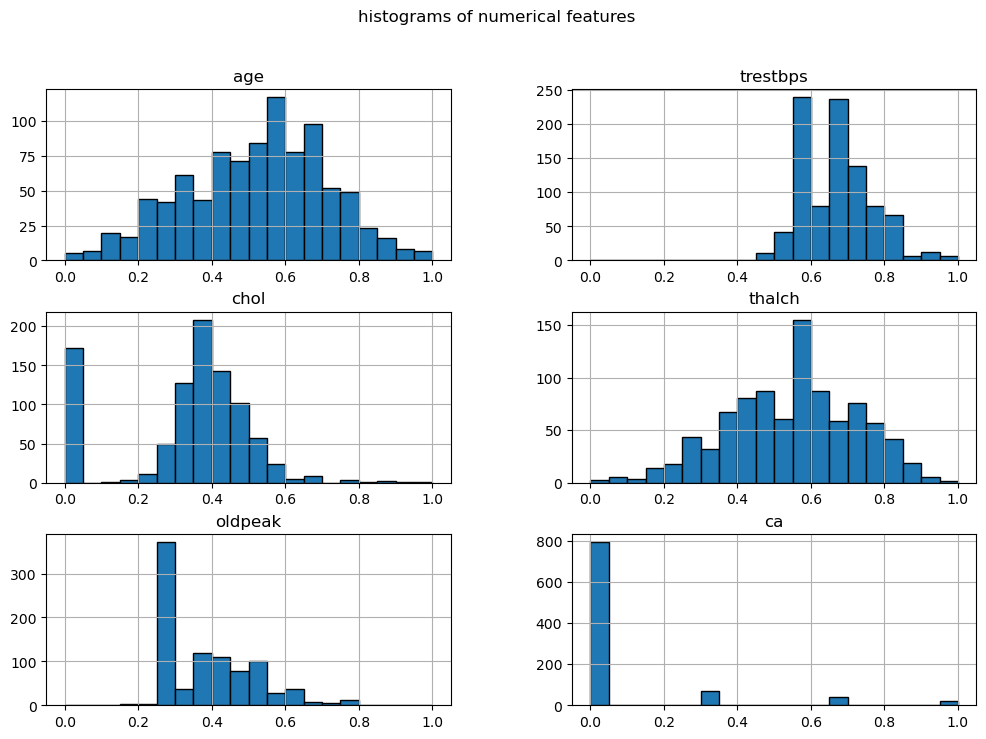

In [51]:
df_encoded[numerical_col].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.suptitle('histograms of numerical features')
plt.show()

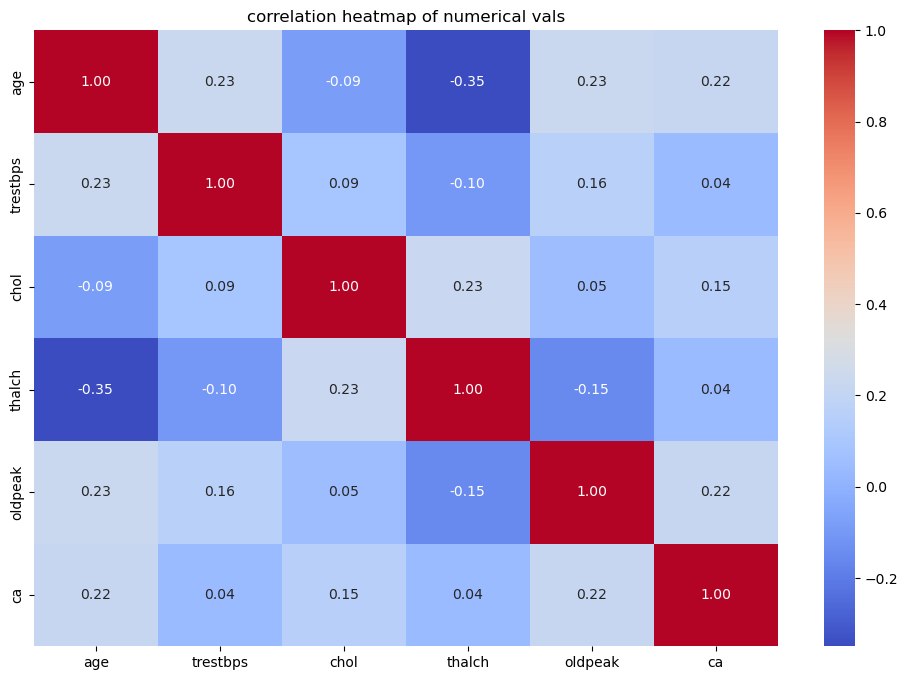

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded[numerical_col].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation heatmap of numerical vals')
plt.show()

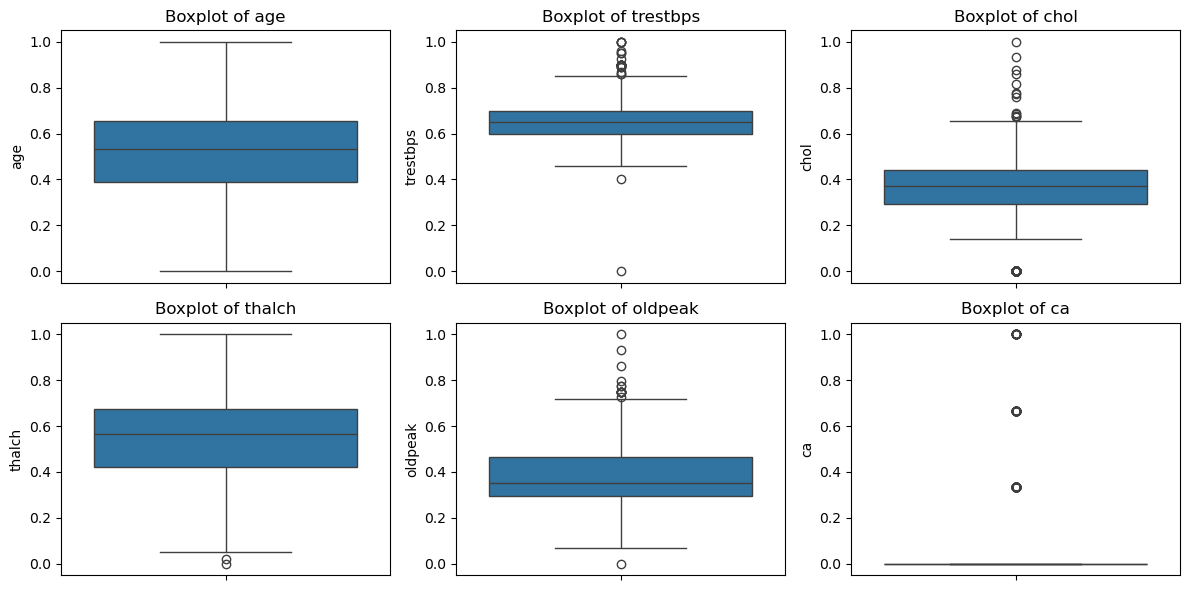

In [53]:
plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_col,1):
  plt.subplot(2,3,i)
  sns.boxplot(y=df_encoded[col])
  plt.title(f'Boxplot of {col}')
  
plt.tight_layout()
plt.show()